<a href="https://colab.research.google.com/github/travoholicspirit/SentimentAnalysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extract the reviews from the website

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib.pyplot as plt

I am using the flipkart link to get the customer reviews and comments - Link is - https://www.flipkart.com/motorola-g13-matte-charcoal-128-gb/product-reviews/itmb7de00f096581?pid=MOBGM2EHGGHQ9GN7&lid=LSTMOBGM2EHGGHQ9GN7V0BTAY&marketplace=FLIPKART&page={page_num}'

In [2]:
#To extract reviews from multiple pages

all_reviews = []
for page_num in range(1, 3):

  #url to get the reviews 
  url_source = 'https://www.flipkart.com/motorola-g13-matte-charcoal-128-gb/product-reviews/itmb7de00f096581?pid=MOBGM2EHGGHQ9GN7&lid=LSTMOBGM2EHGGHQ9GN7V0BTAY&marketplace=FLIPKART&page={page_num}'
  url = url_source.format(page_num=page_num)
  r = requests.get(url)

  #Extract data using BeautifulSoup Library
  soup = BeautifulSoup(r.content, 'lxml')

  #To extract the reviews, need to mention the Div and the class "_2-N8zT" & subclass "t-ZTKy" to define the field
  reviews = soup.find_all('p',{'class':"_2-N8zT"})
  div_reviews = soup.find_all('div',{'class':"t-ZTKy"})

    # To add the reviews of the next page one after the other 
  review2 = ''
  for review in reviews:
      review2 += review.text.strip() + '\n'

  for div_review in div_reviews:
      review2 += div_review.text.strip() + '\n'   
  all_reviews.append(review2)

print(all_reviews)



['Terrific purchase\nTerrific purchase\nHighly recommended\nDoes the job\nJust wow!\nExcellent\nSuper!\nFair\nWorth every penny\nGood quality product\nI got this mobile in just 2 days after placing order.1. Phone is very light weight2. Colour of phone is awesome.3. Dolby Atmos speakers are just mind blowing.4. Feels like premium phone.5. Video quality is quiet good6. Camera quality is normal . 7. Battery backup is also good8. Charging is about 1.5 percent per minute .# charger need to be of more wattREAD MORE\nVery nice mobileREAD MORE\nNice product..realy worth for moneyREAD MORE\nJust ok nothing special may update this Just spend a day with thisREAD MORE\nVery very very nice product 👍👍👍READ MORE\nAmazing mobile in the price segment of 10 thousand.  If your budget is 10k then you must go for thisREAD MORE\nIn 10 k best phon. Performance wise nice 👍READ MORE\nCharger low qualityDesign best qualityCamera is good qualityDisplay is good quality Chargering time time heat phone and chargerR

In [3]:
for review in all_reviews:
    with open('reviews.csv', 'a', encoding='utf-8') as f:
        f.write(review + '\n')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Perform Sentiment Analysis on the data from csv file

In [5]:
#Before starting to work on the file, need to do data cleaning and remove all the blanks and unwanted entries.

#lets get the remaining libraries executed.
import re
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from tqdm.notebook import tqdm
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [9]:
# Download stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

# Load input dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/reviews.csv")

# Load stopwords
stop_words = set(stopwords.words('english'))

# Initialize sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Define regex pattern to match unwanted characters
pattern = r'[^A-Za-z\s]+'

# Create empty output dataframe
output_df = pd.DataFrame(columns=["ID", "REVIEWS", "POSITIVE_SCORE", "NEGATIVE_SCORE", "SENTIMENT", "SUBJECTIVITY_SCORE"])

# Loop through rows of input dataframe
for index, row in df.iterrows():
    ID = row["ID"]
    REVIEWS = row["REVIEWS"]

        # Apply regex to remove unwanted characters
    cleaned_text = re.sub(pattern, ' ', REVIEWS)

        # Tokenize text into words
    words = nltk.word_tokenize(cleaned_text)
     
    # Remove stopwords and lowercase
    words = [word.lower() for word in words if word.lower() not in stop_words]

        # Join words back into cleaned text
    cleaned_text = ' '.join(words)

    # Get polarity scores for cleaned text
    scores = vader.polarity_scores(cleaned_text)
    
    # Add compound score to scores dictionary
    scores["compound"] = scores["pos"] - scores["neg"]

            # To get the subjectivity scores
    blob = TextBlob(cleaned_text)
    polarity_score = blob.sentiment.polarity
    subjectivity_score = blob.sentiment.subjectivity

    # Append results to output dataframe
    output_df = pd.concat([output_df, pd.DataFrame({"ID": ID, "REVIEWS": REVIEWS, "POSITIVE_SCORE": scores["pos"], 
                                  "NEGATIVE_SCORE": scores["neg"], "SENTIMENT": scores["compound"],
                                  "SUBJECTIVITY_SCORE": subjectivity_score}, index=[0])])
    
  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
output_df.head()

,ID,REVIEWS,POSITIVE_SCORE,NEGATIVE_SCORE,SENTIMENT,SUBJECTIVITY_SCORE
0,1,Terrific purchase,0.756,0.0,0.756,1.00
0,2,Highly recommended,0.677,0.0,0.677,0.54
0,3,Does the job,0.000,0.0,0.000,0.00
0,4,Just wow!,1.000,0.0,1.000,1.00
0,5,Excellent,1.000,0.0,1.000,1.00


# EDA and Data Visualization

In [11]:
output_df.shape


(199, 6)

In [13]:
output_df['SENTIMENT'].value_counts()

 1.000    54
 0.000    17
 0.592    13
 0.804    11
 0.487     7
          ..
 0.420     1
 0.502     1
 0.651     1
 0.872     1
-0.730     1
Name: SENTIMENT, Length: 68, dtype: int64

<Axes: xlabel='SENTIMENT', ylabel='Count'>

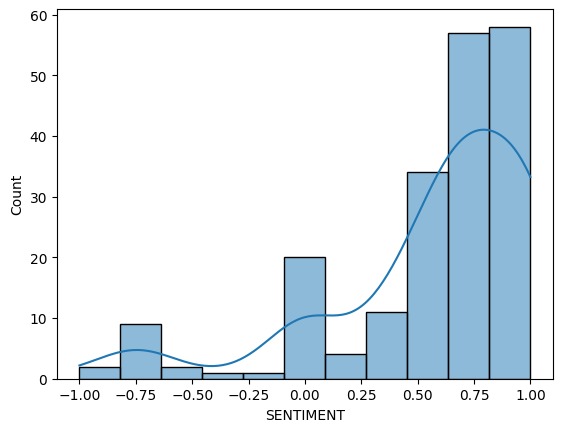

In [14]:
sns.histplot(output_df['SENTIMENT'], kde=True)

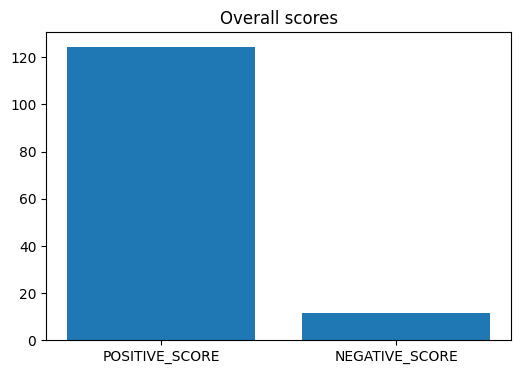

In [16]:
#to sum the positive and negative scores

positive_sum = output_df['POSITIVE_SCORE'].sum()
negative_sum = output_df['NEGATIVE_SCORE'].sum()

# create a bar chart
plt.figure(figsize=(6,4))
plt.title('Overall scores')
plt.bar(['POSITIVE_SCORE', 'NEGATIVE_SCORE'], [positive_sum, negative_sum])
plt.show()

# Plotting word cloud for Sentiment Scores

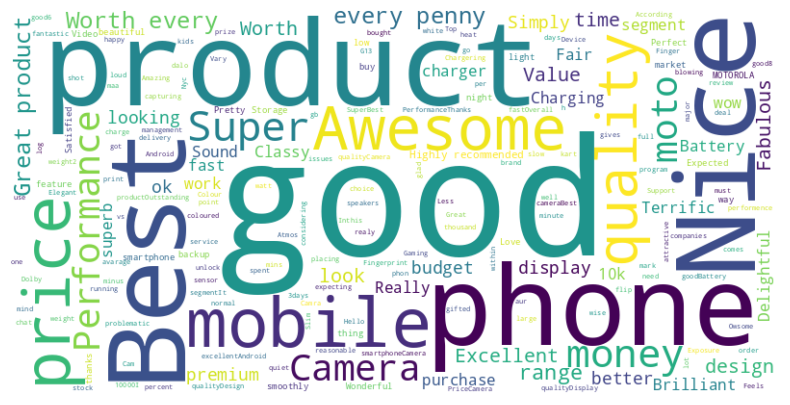

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# filter the reviews with a positive score
positive_reviews = output_df[output_df['POSITIVE_SCORE'] > output_df['NEGATIVE_SCORE']]

# concatenate all positive review text into a single string
positive_text = ' '.join(review for review in positive_reviews['REVIEWS'])

# create a word cloud object with the positive word frequencies and plot it
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

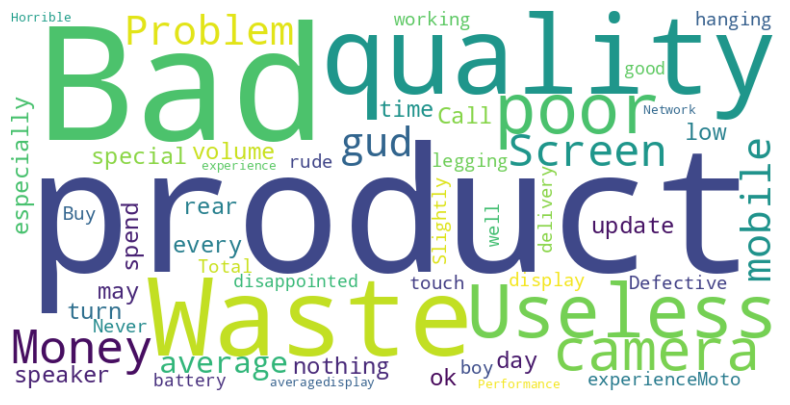

In [18]:
negative_reviews = output_df[output_df['NEGATIVE_SCORE'] > output_df['POSITIVE_SCORE']]

# concatenate all negative review text into a single string
negative_text = ' '.join(review for review in negative_reviews['REVIEWS'])

# create a word cloud object with the negative word frequencies and plot it
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()